In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from scipy.fftpack import fft, ifft

import sys
sys.path.append("../library-Git/")
from defaultPlot import logFit
from stringFormat import *
from readData import read

In [1]:
time = {}
orderParameter = {}
logBinOrderParameter = {}
meanClusterSize = {}
secondGiant = {}
interEventTime = {}
deltaAcceptance = {}
orderParameterDistribution = {}
clusterSizeDistribution = {}
ageDistribution_before = {}
ageDistribution_during = {}
interEventTimeDistribution_before = {}
interEventTimeDistribution_during = {}
deltaUpperBoundDistribution_before = {}
deltaUpperBoundDistribution_during = {}
deltaAcceptanceDistribution_before = {}
deltaAcceptanceDistribution_during = {}
interEventTime_DeltaAcceptance = {}
upperBound_DeltaAcceptance = {}
deltaUpperBound_DeltaAcceptance = {}
dynamics_before = {}
dynamics_during = {}
checkTime = [0.9320, 0.9370, 0.9482]
checkOrderParameter = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.8254, 0.86, 0.9]

# Read Data

In [10]:
networkSize = 1280000
acceptanceThreshold = 0.9

time[networkSize] = np.linspace(0, 1, networkSize+1)
time[networkSize] = time[networkSize][:-1]
# orderParameter[networkSize, acceptanceThreshold] = read("orderParameter", networkSize, acceptanceThreshold)
# logBinOrderParameter[networkSize, acceptanceThreshold] = read("orderParameter/", networkSize, acceptanceThreshold)
# meanClusterSize[networkSize, acceptanceThreshold] = read("meanClusterSize", networkSize, acceptanceThreshold)
# secondGiant[networkSize, acceptanceThreshold] = read("secondGiant", networkSize, acceptanceThreshold)
# interEventTime[networkSize, acceptanceThreshold] = read("interEventTime", networkSize, acceptanceThreshold)
# deltaAcceptance[networkSize, acceptanceThreshold] = read("deltaAcceptance", networkSize, acceptanceThreshold)
# for t in checkTime:
#     orderParameterDistribution[networkSize, acceptanceThreshold, t] = read("orderParameterDistribution", networkSize, acceptanceThreshold, t)
# for op in checkOrderParameter:
#     clusterSizeDistribution[networkSize, acceptanceThreshold, op] = read("clusterSizeDistribution", networkSize, acceptanceThreshold, op)
ageDistribution_before[networkSize, acceptanceThreshold] = read("ageDistribution/before", networkSize, acceptanceThreshold)
ageDistribution_during[networkSize, acceptanceThreshold] = read("ageDistribution/during", networkSize, acceptanceThreshold)
# interEventTimeDistribution_before[networkSize, acceptanceThreshold] = read("interEventTimeDistribution/before", networkSize, acceptanceThreshold)
# interEventTimeDistribution_during[networkSize, acceptanceThreshold] = read("interEventTimeDistribution/during", networkSize, acceptanceThreshold)
deltaUpperBoundDistribution_before[networkSize, acceptanceThreshold] = read("deltaUpperBoundDistribution/before", networkSize, acceptanceThreshold)
deltaUpperBoundDistribution_during[networkSize, acceptanceThreshold] = read("deltaUpperBoundDistribution/during", networkSize, acceptanceThreshold)
# deltaAcceptanceDistribution_before[networkSize, acceptanceThreshold] = read("deltaAcceptanceDistribution/before", networkSize, acceptanceThreshold)
# deltaAcceptanceDistribution_during[networkSize, acceptanceThreshold] = read("deltaAcceptanceDistribution/during", networkSize, acceptanceThreshold)
# interEventTime_DeltaAcceptance[networkSize, acceptanceThreshold] = read("interEventTime_DeltaAcceptance", networkSize, acceptanceThreshold)
upperBound_DeltaAcceptance[networkSize, acceptanceThreshold] = read("upperBound_DeltaAcceptance", networkSize, acceptanceThreshold)
deltaUpperBound_DeltaAcceptance[networkSize, acceptanceThreshold] = read("deltaUpperBound_DeltaAcceptance", networkSize, acceptanceThreshold)
# dynamics_before[networkSize, acceptanceThreshold] = read("dynamics", networkSize, acceptanceThreshold)
# dynamics_during[networkSize, acceptanceThreshold] = read("dynamics/", networkSize, acceptanceThreshold)

# Graph

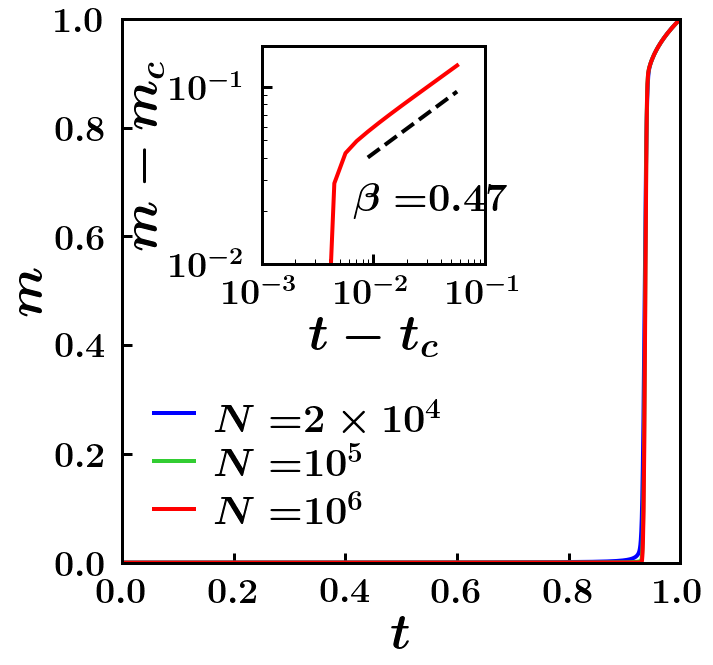

In [10]:
_, ax = plt.subplots()

networkSize = 1280000
acceptanceThreshold = 0.5

# plot default
ax.plot(time[20000], orderParameter[20000, acceptanceThreshold], color='blue', label=latexBoldString("N=")+latexBoldSci(20000))
ax.plot(time[160000], orderParameter[160000, acceptanceThreshold], color='limegreen', label=latexBoldString("N=")+latexBoldSci(160000))
ax.plot(time[networkSize], orderParameter[networkSize, acceptanceThreshold], color='red', label=latexBoldString("N=")+latexBoldSci(networkSize))

# default setting
xtick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ytick = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldFloat(xtick,1))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldFloat(ytick,1))
ax.set_xlim(xtick[0], xtick[-1])
ax.set_ylim(ytick[0], ytick[-1])
ax.legend(loc='lower left')
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("m"))

# inset data
networkSize = 10240000
reducedT = logBinOrderParameter[networkSize, acceptanceThreshold][0]
op = logBinOrderParameter[networkSize, acceptanceThreshold][1]
mask = op>=0
reducedT = reducedT[mask]
op = op[mask]

# inset plot
ax1 = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.25,0.55,1,1), bbox_transform=ax.transAxes, loc='lower left', borderpad=0.0)
ax1.plot(reducedT, op, color='red')

# inset log fitting
fitX, fitY, beta, residual = logFit(reducedT[4:], op[4:], offset=0.15)
ax1.plot(fitX, fitY, 'k--')
ax1.text(6.5e-3,2e-2, latexBoldString("\\beta=")+latexBoldFloat(beta,2), fontsize=40)

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexBoldString("t-t_c"))
ax1.set_ylabel(latexBoldString("m-m_c"))
ax1.set_xlim([1e-3,1e-1])
ax1.set_ylim(bottom=1e-2)
xtick = [1e-3, 1e-2, 1e-1]
ytick = [1e-2, 1e-1]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexBoldSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1), np.arange(10,100,10)))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.append(np.arange(1,10,1), np.arange(10,100,10)))
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
# plt.savefig("test")
# plt.savefig("test.png")
plt.show()


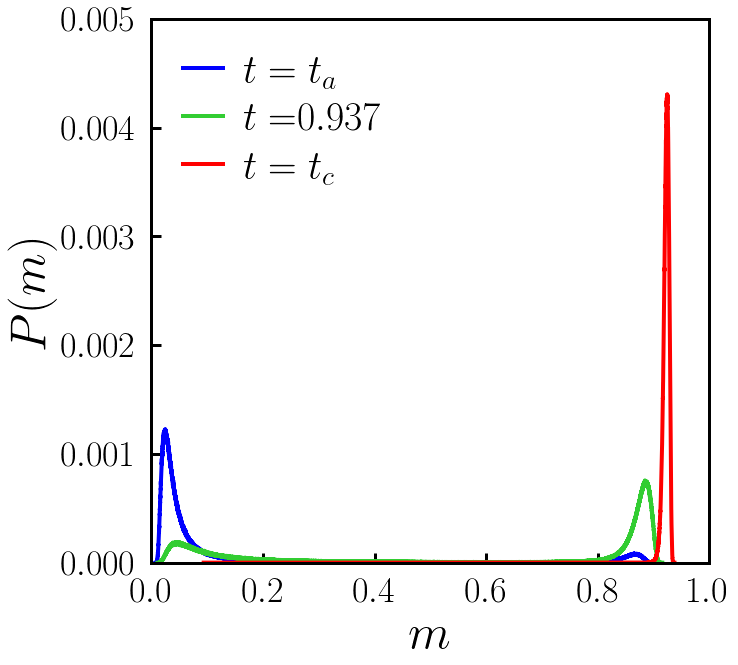

In [6]:
_, ax = plt.subplots()

networkSize = 20000
acceptanceThreshold = 0.5

# default plot
t = 0.932
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="blue", label=latexBoldString("t=t_a"))

t = 0.937
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="limegreen", label=latexBoldString("t=")+latexBoldFloat(t))

t = 0.9482
op, distribution = orderParameterDistribution[networkSize, acceptanceThreshold, t]
ax.plot(op, distribution, color="red", label=latexBoldString("t=t_c"))

# default setting
ax.legend(loc="upper left")
ax.set_xlabel(latexBoldString("m"))
ax.set_ylabel(latexBoldString("P(m)"))
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 0.005])
xtick = np.linspace(0.0, 1.0, 6)
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldFloat(xtick,1))
ytick = [0, 0.001, 0.002, 0.003, 0.004, 0.005]
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldFloat(ytick,3))

# save and show
plt.show()

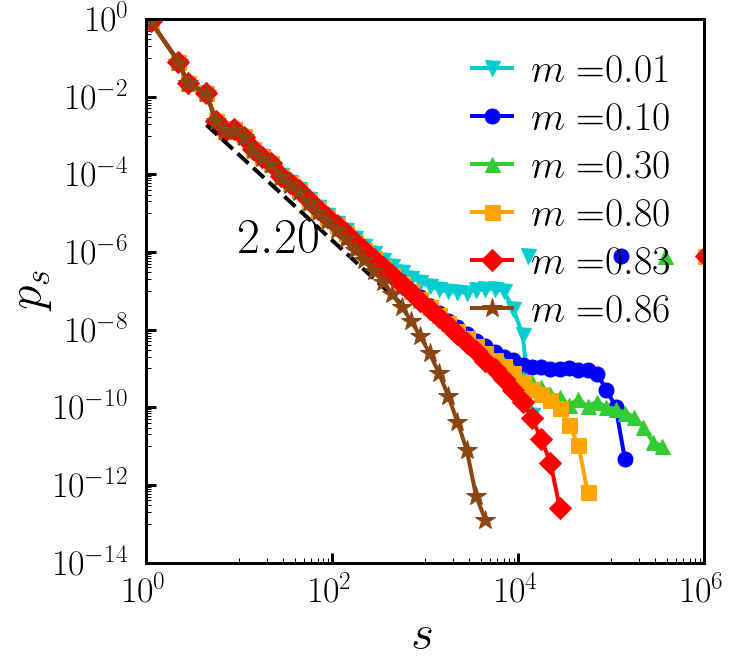

In [4]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# default plot
op = 0.01
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='v', color='darkturquoise', label=latexBoldString("m=")+latexBoldFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='v', color='darkturquoise')

op = 0.1
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='o', color='blue', label=latexBoldString("m=")+latexBoldFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='o', color='blue')

op = 0.3
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='^', color='limegreen', label=latexBoldString("m=")+latexBoldFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='^', color='limegreen')

op = 0.8
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='s', color='orange', label=latexBoldString("m=")+latexBoldFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='s', color='orange')

op = 0.8254
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='D', color='red', label=latexBoldString("m=")+latexBoldFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='D', color='red')

# log fit
fitX, fitY, tau, residual = logFit(clusterSize[3:25], dist[3:25], offset=0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(1e1,1e-6, latexBoldFloat(-1*tau,2), fontsize=50)

op = 0.86
clusterSize, dist = clusterSizeDistribution[networkSize, acceptanceThreshold, op]
ax.plot(clusterSize, dist, marker='*', markersize=20, color='saddlebrown', label=latexBoldString("m=")+latexBoldFloat(op,2))
ax.plot(op*networkSize, 1/networkSize, marker='*', markersize=20, color='saddlebrown')

# default setting
ax.set_xlabel(latexBoldString("s"))
ax.set_ylabel(latexBoldString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc="upper right")
ax.set_xlim([1,1e6])
ax.set_ylim(top=1, bottom=1e-14)
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-14, 1e-12, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e4, subs=np.append(np.arange(10,100,10), np.arange(1000,10000,1000)))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

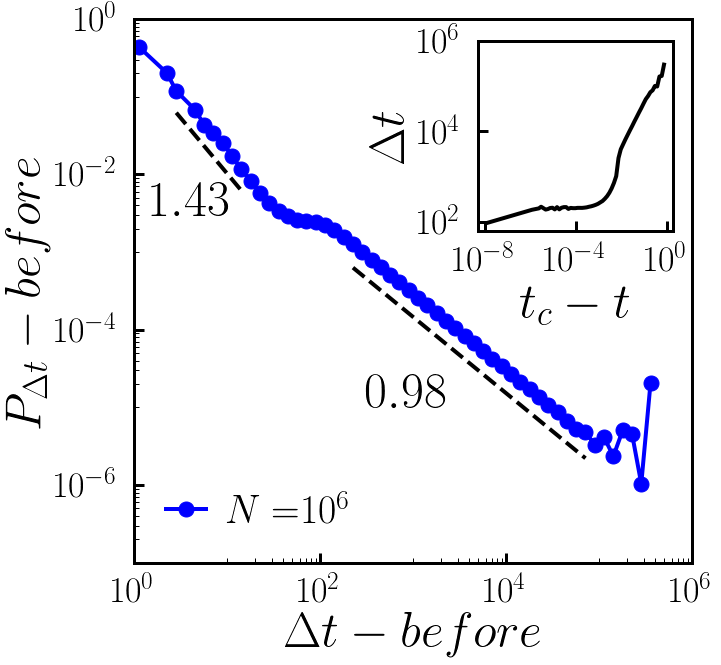

In [42]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet = interEventTimeDistribution_before[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_before[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexBoldString("N=")+latexBoldSci(networkSize))

# log fit
fitX, fitY, alpha, residual = logFit(iet[2:9], dist[2:9], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(1.5, 3e-3, latexBoldFloat(-1*alpha,2), fontsize=50)
fitX, fitY, alpha, residual = logFit(iet[20:-7], dist[20:-7], offset=0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(3e2, 1e-5, latexBoldFloat(-1*alpha,2), fontsize=50)

# main setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta t-before"))
ax.set_ylabel(latexBoldString("P_{\Delta t}-before"))
ax.set_xlim([1e0,1e6])
ax.set_ylim([1e-7,1e0])
xtick = [1e0, 1e2, 1e4, 1e6] 
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# inset plot
ax1 = inset_axes(ax, width="35%", height="35%", loc='lower left', bbox_to_anchor=(0.615, 0.61, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
reducedT = interEventTime[networkSize, acceptanceThreshold][0]
iet = interEventTime[networkSize, acceptanceThreshold][1]
ax1.plot(reducedT, iet, 'k-')

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexBoldString("t_c-t"))
ax1.set_ylabel(latexBoldString("\Delta t"))
xtick = [1e-8,1e-4,1e0]
ytick = [1e2,1e4,1e6]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexBoldSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()


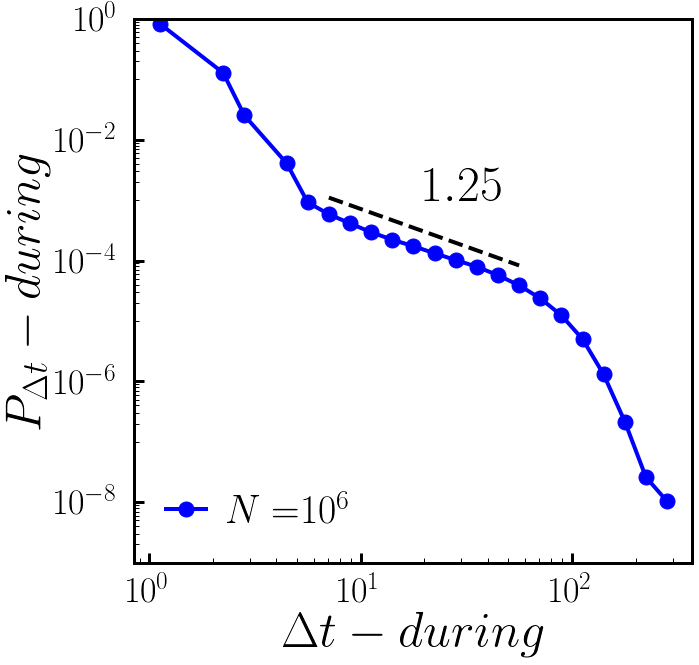

In [49]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet = interEventTimeDistribution_during[networkSize, acceptanceThreshold][0]
dist = interEventTimeDistribution_during[networkSize, acceptanceThreshold][1]
ax.plot(iet, dist, 'o-', color='blue', label=latexBoldString("N=")+latexBoldSci(networkSize))

# log fit
fitX, fitY, alpha, residual = logFit(iet[5:15], dist[5:15], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(2e1, 1e-3, latexBoldFloat(-1*alpha,2), fontsize=50)

# main setting
ax.legend(loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta t-during"))
ax.set_ylabel(latexBoldString("P_{\Delta t}-during"))
ax.set_ylim([1e-9,1e0])
xtick = [1e0, 1e1, 1e2]
ytick = [1e-8, 1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

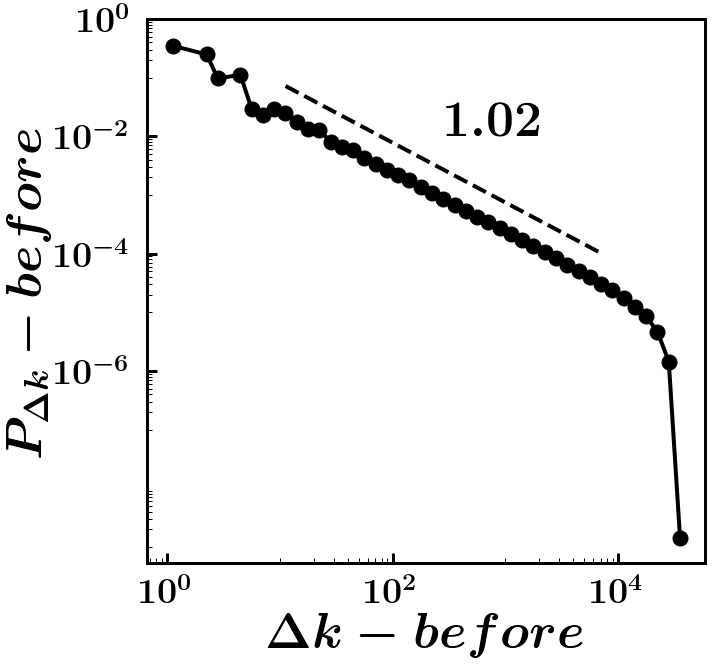

In [30]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.2

# main plot
delK, dist = deltaUpperBoundDistribution_before[networkSize, acceptanceThreshold]
ax.plot(delK, dist, 'o-', color='black')

# log fit
fitX, fitY, alpha, residual = logFit(delK[7:-7], dist[7:-7], offset=-0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(3e2, 1e-2, latexBoldFloat(-1*alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta k-before"))
ax.set_ylabel(latexBoldString("P_{\Delta k}-before"))
xtick = [1e0, 1e2, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
# plt.savefig("../data/mBFW/figure/deltaUpperBound_before_0.5.pdf")
plt.show()

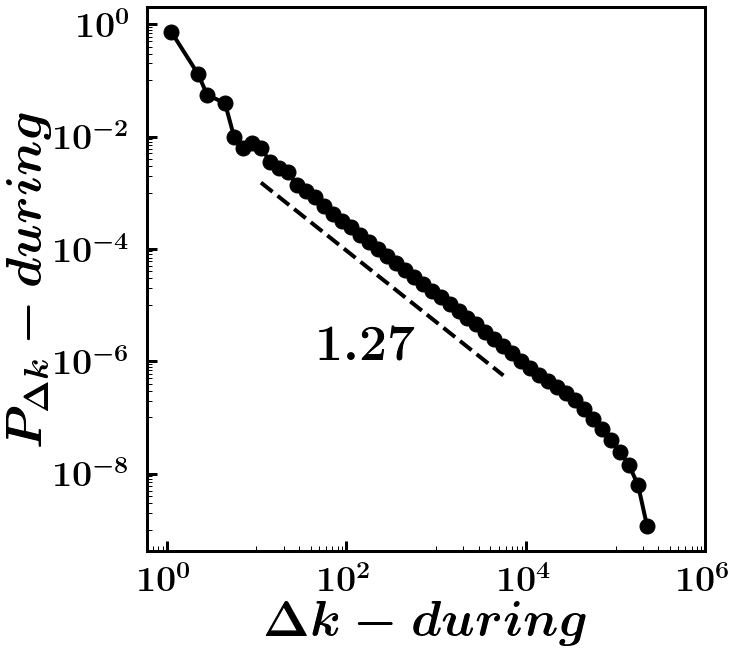

In [32]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.9

# main plot
delK, dist = deltaUpperBoundDistribution_during[networkSize, acceptanceThreshold]
ax.plot(delK, dist, 'o-', color='black')

# log fit
fitX, fitY, alpha, residual = logFit(delK[7:35], dist[7:35], offset=0.5)
ax.plot(fitX, fitY, 'k--')
ax.text(5e1, 1e-6, latexBoldFloat(-1*alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta k-during"))
ax.set_ylabel(latexBoldString("P_{\Delta k}-during"))
# ax.set_xlim([1e0,1e6])
# ax.set_ylim([1e-8,1e0])
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-8, 1e-6,1e-4,1e-2,1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.savefig("../data/mBFW/figure/deltaUpperBound_during_0.9.pdf")
plt.show()

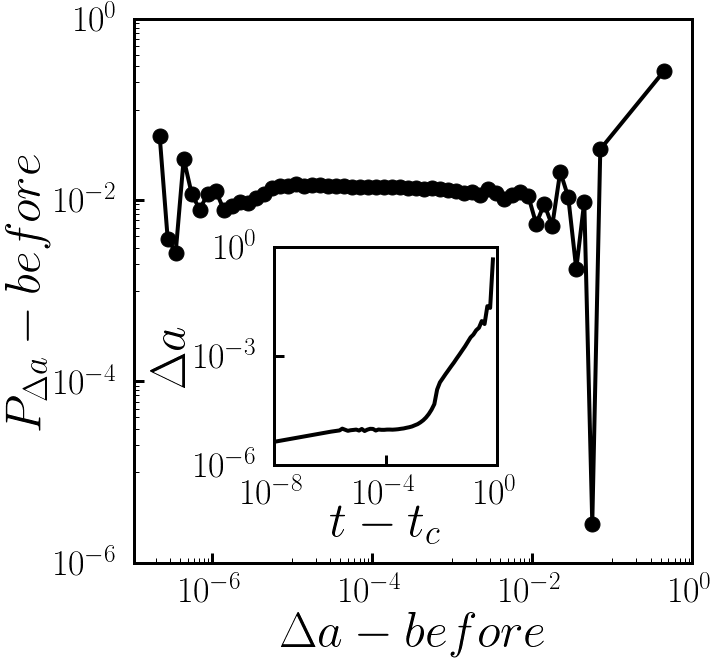

In [81]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delA, dist = deltaAcceptanceDistribution_before[networkSize, acceptanceThreshold]
ax.plot(delA, dist, 'o-', color='black')

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta a-before"))
ax.set_ylabel(latexBoldString("P_{\Delta a}-before"))
ax.set_ylim([1e-6, 1e0])
xtick = [1e-6, 1e-4, 1e-2, 1e0]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# inset plot
ax1 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(0.25, 0.18, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
reducedT = deltaAcceptance[networkSize, acceptanceThreshold][0]
delA = deltaAcceptance[networkSize, acceptanceThreshold][1]
ax1.plot(reducedT, delA, 'k-')

# inset setting
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(latexBoldString("t-t_c"), labelpad=-10)
ax1.set_ylabel(latexBoldString("\Delta a"), labelpad=0)
ax1.set_xlim([1e-8,1e0])
ax1.set_ylim([1e-6,1e0])
xtick = [1e-8,1e-4,1e0]
ytick = [1e-6,1e-3,1e0]
ax1.set_xticks(xtick)
ax1.set_xticklabels(list_latexBoldSci(xtick))
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax1.xaxis.set_minor_locator(minortick_x)
ax1.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e3, subs=np.arange(100,1000,100))
ax1.yaxis.set_minor_locator(minortick_y)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

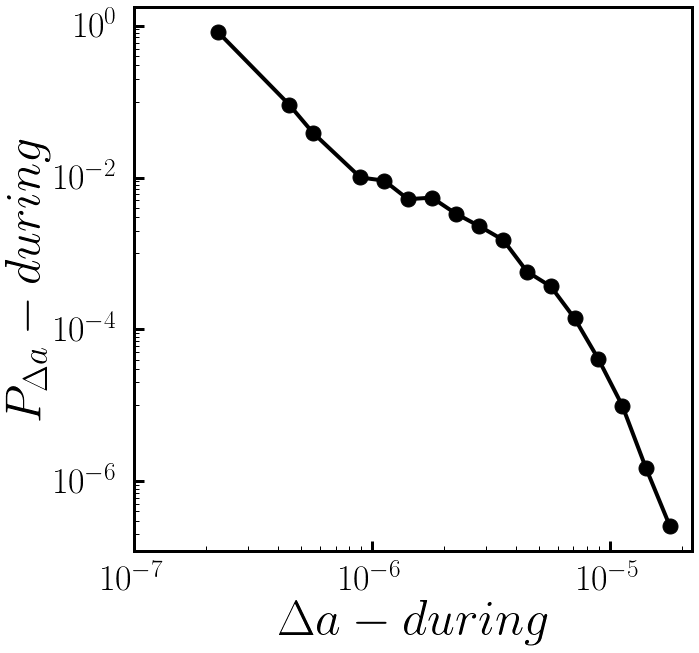

In [86]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
delA, dist = deltaAcceptanceDistribution_during[networkSize, acceptanceThreshold]
ax.plot(delA, dist, 'o-', color='black')

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta a-during"))
ax.set_ylabel(latexBoldString("P_{\Delta a}-during"))
xtick = [1e-7, 1e-6, 1e-5]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e1, subs=np.arange(1,10,1))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

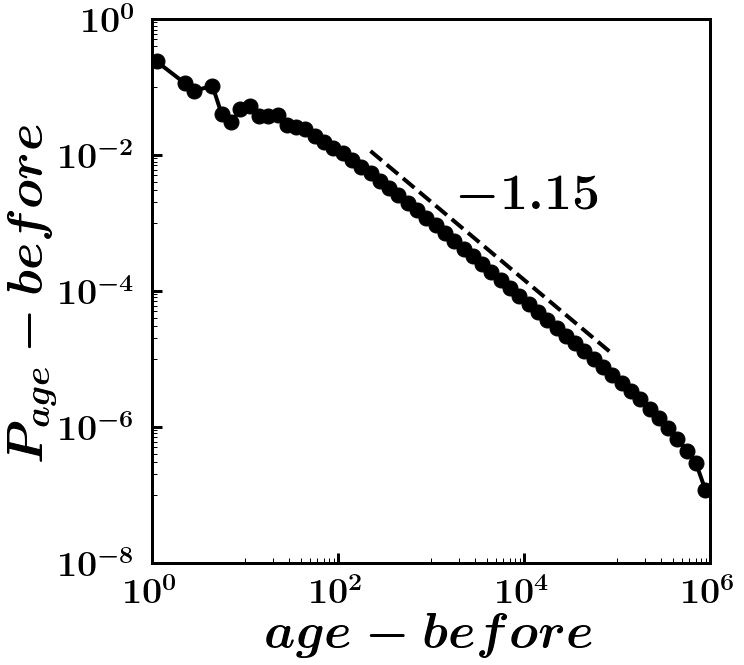

In [46]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.9

# main plot
age, dist = ageDistribution_before[networkSize, acceptanceThreshold]
ax.plot(age, dist, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(age[20:-10], dist[20:-10], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(2e3, 2e-3, latexBoldFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("age-before"))
ax.set_ylabel(latexBoldString("P_{age}-before"))
ax.set_xlim([1e0,1e6])
ax.set_ylim([1e-8,1e0])
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-8, 1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()



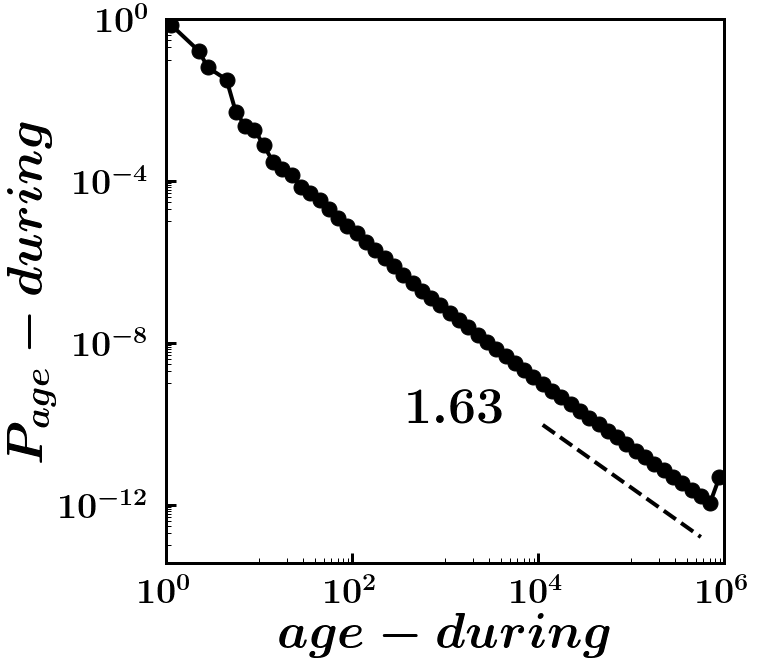

In [68]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.9

# main plot
age, dist = ageDistribution_during[networkSize, acceptanceThreshold]
ax.plot(age, dist, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(age[-20:-2], dist[-20:-2], offset=1)
ax.plot(fitX, fitY, 'k--')
ax.text(4e2, 1e-10, latexBoldFloat(-1*alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("age-during"))
ax.set_ylabel(latexBoldString("P_{age}-during"))
ax.set_xlim([1e0,1e6])
ax.set_ylim(top=1e0)
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-12, 1e-8, 1e-4, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()



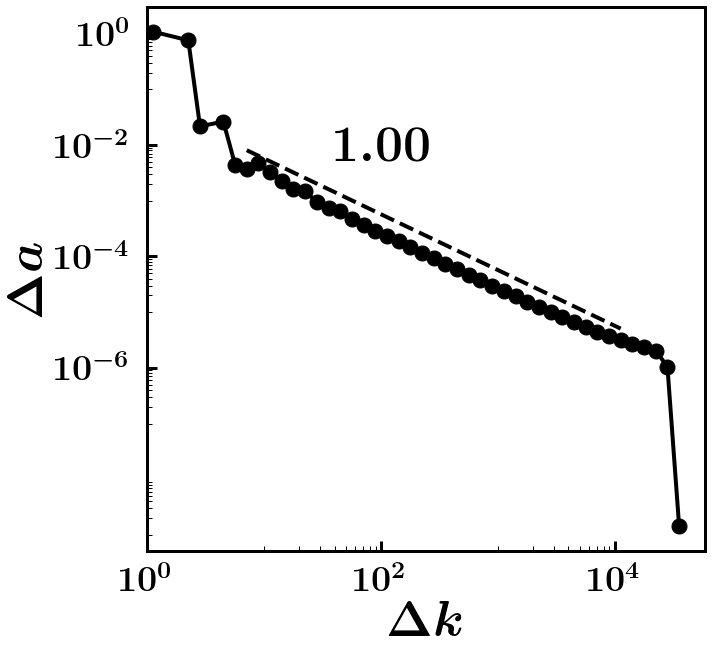

In [33]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.2

# main plot
delK, delA = deltaUpperBound_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(delK, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(delK[5:-5], delA[5:-5], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexBoldFloat(-1*alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta k"))
ax.set_ylabel(latexBoldString("\Delta a"))
ax.set_xlim(left=1e0)
# ax.set_xlim([1e0,1e6])
# ax.set_ylim([1e-6,1e0])
xtick = [1e0, 1e2, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
# plt.savefig("../data/mBFW/figure/deltaK_deltaA_0.5.pdf")
plt.show()

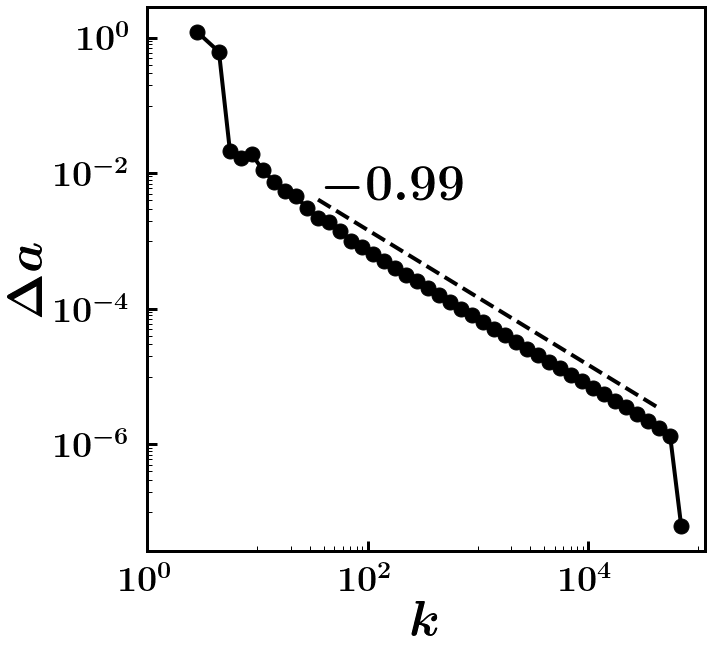

In [34]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.2

# main plot
k, delA = upperBound_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(k, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(k[10:-2], delA[10:-2], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexBoldFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("k"))
ax.set_ylabel(latexBoldString("\Delta a"))
xtick = [1e0, 1e2, 1e4]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
# plt.savefig("../data/mBFW/figure/K_deltaA_0.5.pdf")
plt.show()

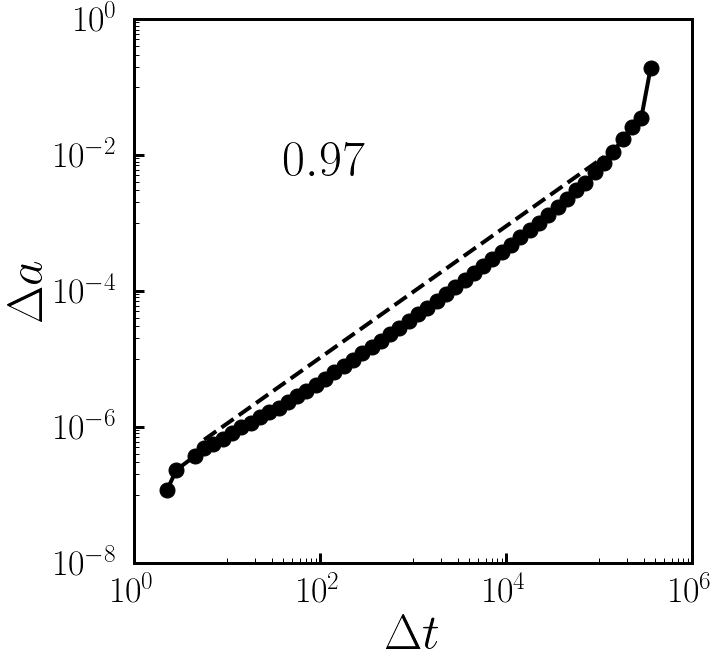

In [130]:
_, ax = plt.subplots(figsize=(10,10))

networkSize = 1280000
acceptanceThreshold = 0.5

# main plot
iet, delA = interEventTime_DeltaAcceptance[networkSize, acceptanceThreshold]
ax.plot(iet, delA, 'ko-')

# log fit
fitX, fitY, alpha, residual = logFit(iet[3:-5], delA[3:-5], offset=-0.3)
ax.plot(fitX, fitY, 'k--')
ax.text(4e1, 5e-3, latexBoldFloat(alpha,2), fontsize=50)

# main setting
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(latexBoldString("\Delta t"))
ax.set_ylabel(latexBoldString("\Delta a"))
ax.set_xlim([1e0, 1e6])
ax.set_ylim([1e-8, 1e0])
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-8, 1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticks(ytick)
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

# Dynamics

In [133]:
networkSize = 1280000
acceptanceThreshold = 0.5

t, U, PL, PU, M, K, _ = dynamics_before[networkSize, acceptanceThreshold]

index = []
upperBound = []
i = 1
while len(index) < 6:
    if PL[i] == 1:
        index.append(i-1)
        upperBound.append(K[i-1])
    i += 1
# print(index)
# print(upperBound)

startIndex = index[1]-1
endIndex = index[-1]
A = t/U
PA = PL/PU
L = t/networkSize
l = L[startIndex:endIndex]
u = U[startIndex:endIndex]/networkSize
a = A[startIndex:endIndex]
k = K[startIndex:endIndex]



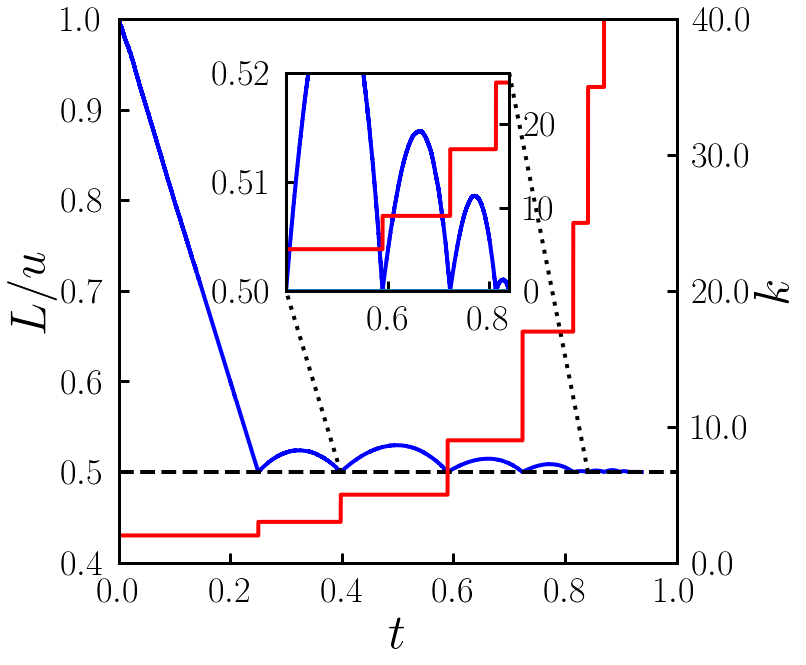

In [134]:
_, ax = plt.subplots()

inset_x = 0.3
inset_y = 0.5

# default plot
ax.plot(L, A, color='blue')
ax.plot([0,1], [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("L/u"))
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
xtick = np.linspace(0, 1, 6)
ytick = np.linspace(0.4, 1, 7)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexBoldFloat(xtick, 1))
ax.set_yticklabels(list_latexBoldFloat(ytick, 1))

# zoom line
inset_x = 0.3
inset_y = 0.5
ax.plot([L[startIndex], inset_x], [0.5, (acceptanceThreshold+0.9)*inset_y], 'k:')
ax.plot([L[endIndex], inset_x+0.4], [0.5, (acceptanceThreshold+0.9)*inset_y+(1.1-acceptanceThreshold)*0.4], 'k:')

# twin plot
ax1 = ax.twinx()
ax1.plot(L, K, color='red')

# twin setting
ax1.set_ylabel(latexBoldString("k"))
ax1.set_ylim([0,40])
ytick = np.linspace(0,40,5)
ax1.set_yticks(ytick)
ax1.set_yticklabels(list_latexBoldFloat(ytick, 0))

# inset plot
ax2 = inset_axes(ax, width="40%", height="40%", loc='lower left', bbox_to_anchor=(inset_x, inset_y, 1, 1), bbox_transform=ax.transAxes, borderpad=0.0)
ax2.plot(l, a, color='blue')
ax2.plot([l[0], l[-1]], [acceptanceThreshold, acceptanceThreshold])

# inset settting
ax2.set_xlim([l[0], l[-1]])
ax2.set_ylim([acceptanceThreshold, acceptanceThreshold+0.02])
xtick = [0.6,0.8]
ytick = [0.5,0.51,0.52]
ax2.set_xticks(xtick)
ax2.set_yticks(ytick)
ax2.set_xticklabels(list_latexBoldFloat(xtick, 1))
ax2.set_yticklabels(list_latexBoldFloat(ytick, 2))

# inset twin plot
ax3 = ax2.twinx()
ax3.plot(l, k, color='red')

# inset twin setting
ytick = [0,10,20]
ax3.set_yticks(ytick)
ax3.set_yticklabels(list_latexBoldFloat(ytick, 0))

# save and show
plt.show()

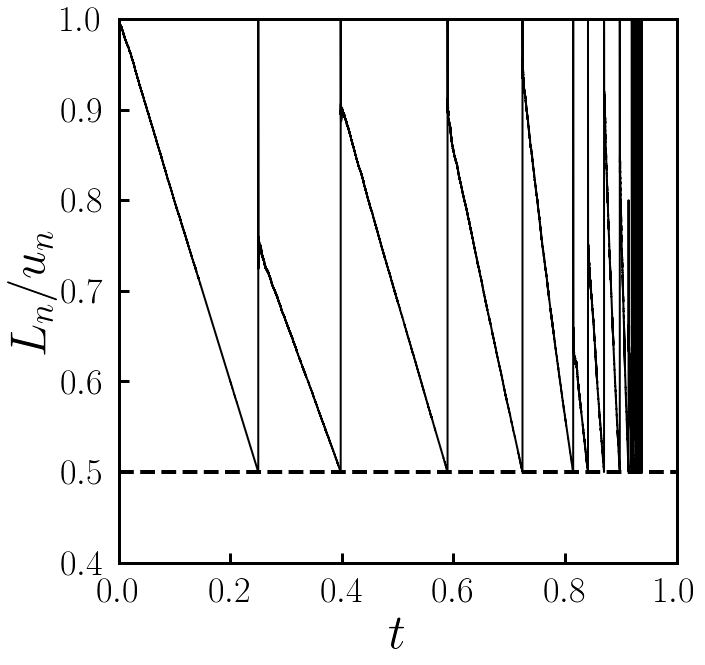

In [135]:
_, ax = plt.subplots()

# main plot
ax.plot(L, PA, color='black', linewidth=2)
ax.plot([0,1],[acceptanceThreshold,acceptanceThreshold], 'k--')

# main setting
ax.set_xlim([0,1])
ax.set_ylim([acceptanceThreshold-0.1,1])
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("L_n/u_n"))

# save and show
plt.show()

In [136]:
sampleNum = len(L)
sampligFrequency = 1.0/networkSize

fft_PA = fft(PA) / sampleNum
fft_PA = 2.0*np.abs(fft_PA[0:sampleNum//2])
frequency = np.linspace(0.0, 1.0/(2.0*sampligFrequency), sampleNum//2)
power = np.power(fft_PA, 2)

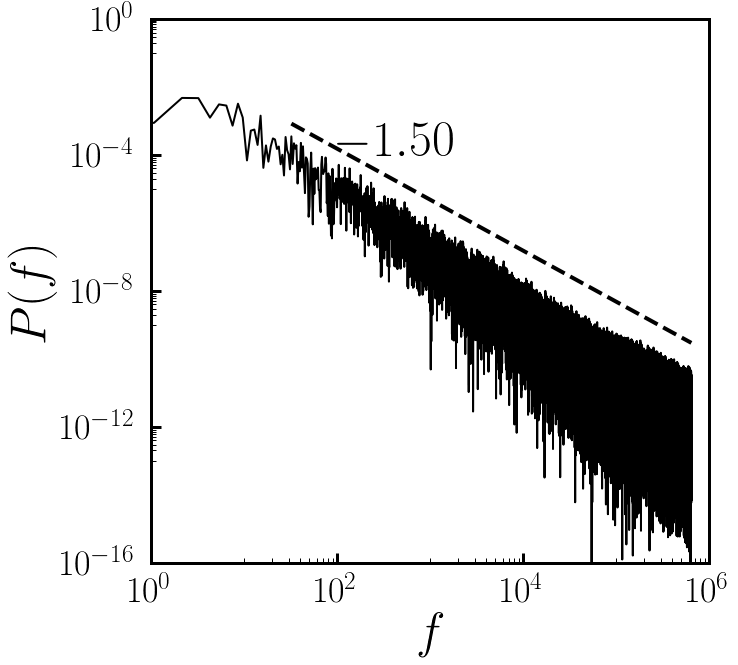

In [144]:
_, ax = plt.subplots()

# main plot
ax.plot(frequency, power, color='black', linewidth=2)

# log fit
fitX, fitY, alpha, residual = logFit(frequency[30:], power[30:], offset=-2)
ax.plot(fitX, fitY, 'k--')
ax.text(1e2, 1e-4, latexBoldFloat(alpha,2))

# main setting
ax.set_xlabel(latexBoldString("f"))
ax.set_ylabel(latexBoldString("P(f)"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e6])
ax.set_ylim([1e-16,1e0])
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-16, 1e-12, 1e-8, 1e-4, 1e0]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
minortick_y = matplotlib.ticker.LogLocator(base=1e4, subs=np.arange(1000,10000,1000))
ax.yaxis.set_minor_locator(minortick_y)
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

In [3]:
networkSize = 1280000
acceptanceThreshold = 0.5

t, U, PL, PU, M, K, _ = dynamics_during[networkSize, acceptanceThreshold]

A = t/U
PA = PL/PU
L = t/networkSize


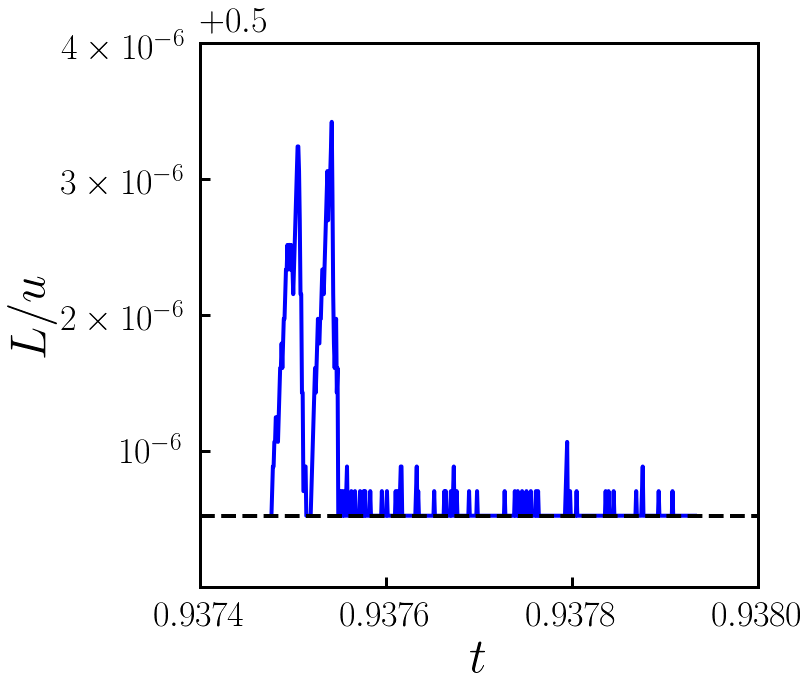

In [14]:
_, ax = plt.subplots()

# default plot
xlim = [0.9374, 0.9380]
ylim = [acceptanceThreshold-6e-7, acceptanceThreshold+4e-6]
ax.plot(L, A, color='blue')
ax.plot(xlim, [acceptanceThreshold, acceptanceThreshold], 'k--')

# default setting
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("L/u"))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
xtick = np.linspace(xlim[0], xlim[1], 4)
ytick = np.linspace(ylim[0], ylim[1], 5)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexBoldFloat(xtick, 4))
ax.set_yticklabels(list_latexBoldSci([0.0, 1e-6, 2e-6, 3e-6, 4e-6]))
ax.text(xlim[0], ylim[1]+1e-7, latexBoldString("+")+latexBoldFloat(acceptanceThreshold), fontsize=36)

# save and show
plt.show()

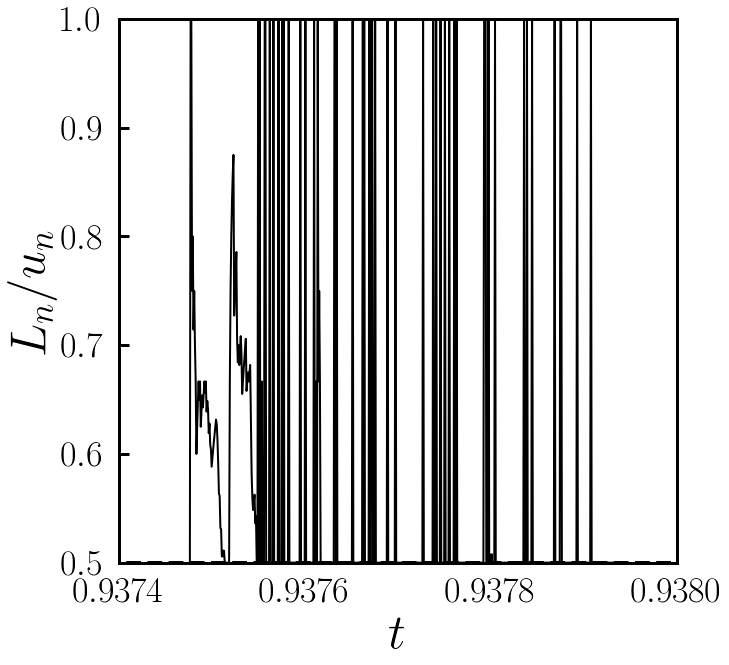

In [16]:
_, ax = plt.subplots()

# main plot
ax.plot(L, PA, color='black', linewidth=2)
ax.plot([0,1],[acceptanceThreshold,acceptanceThreshold], 'k--')

# main setting
ax.set_xlim(xlim)
ax.set_ylim([acceptanceThreshold,1])
ax.set_xlabel(latexBoldString("t"))
ax.set_ylabel(latexBoldString("L_n/u_n"))
xtick = np.linspace(xlim[0], xlim[1], 4)
ytick = np.linspace(acceptanceThreshold,1,6)
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexBoldFloat(xtick, 4))
ax.set_yticklabels(list_latexBoldFloat(ytick, 1))

# save and show
plt.show()

In [17]:
sampleNum = len(L)
sampligFrequency = 1.0/networkSize

fft_PA = fft(PA) / sampleNum
fft_PA = 2.0*np.abs(fft_PA[0:sampleNum//2])
frequency = np.linspace(0.0, 1.0/(2.0*sampligFrequency), sampleNum//2)
power = np.power(fft_PA, 2)

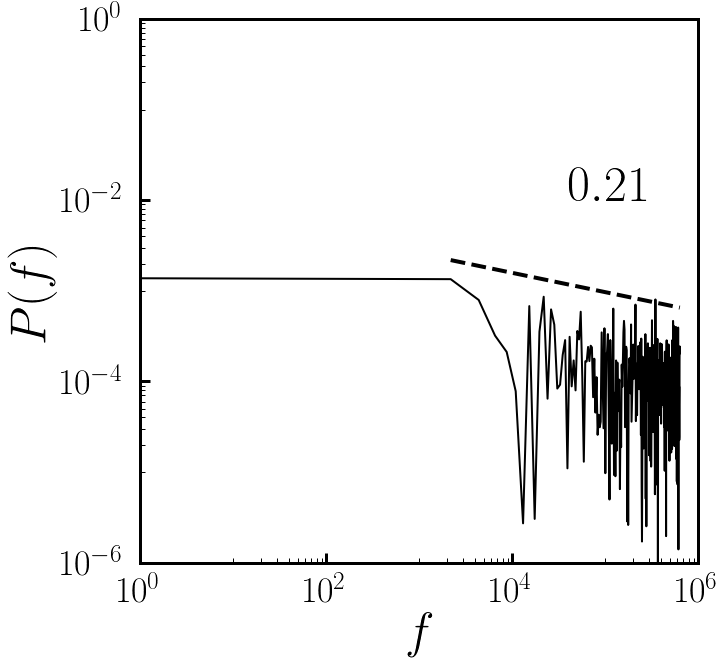

In [21]:
_, ax = plt.subplots()

# main plot
ax.plot(frequency, power, color='black', linewidth=2)

# log fit
fitX, fitY, alpha, residual = logFit(frequency[1:], power[1:], offset=-1)
ax.plot(fitX, fitY, 'k--')
ax.text(4e4, 1e-2, latexBoldFloat(-1*alpha,2))

# main setting
ax.set_xlabel(latexBoldString("f"))
ax.set_ylabel(latexBoldString("P(f)"))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e0,1e6])
ax.set_ylim([1e-6,1e0])
xtick = [1e0, 1e2, 1e4, 1e6]
ytick = [1e-6, 1e-4, 1e-2, 1e0]
ax.set_xticks(xtick)
ax.set_yticks(ytick)
ax.set_xticklabels(list_latexBoldSci(xtick))
ax.set_yticklabels(list_latexBoldSci(ytick))
minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
ax.xaxis.set_minor_locator(minortick_x)
ax.yaxis.set_minor_locator(minortick_y)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()

In [3]:
import pandas as pd

def read(t_filename):
    data = pd.read_csv(t_filename, sep=',', header=None)
    data = data.values.transpose()
    if (len(data) == 1):
        return data[0]
    else:
        return tuple([row for row in data])

In [8]:
filename = "../mBFW/data/clusterSizeDistribution1/N=1.3e+06,g=0.5,e=7600000,m=0.2000-0.txt"
filename = "../data/mBFW/clusterSizeDistribution/logBin/N1.0e+07,G0.5,E25000,OP0.1000.txt"
op, distribution, = read(filename)

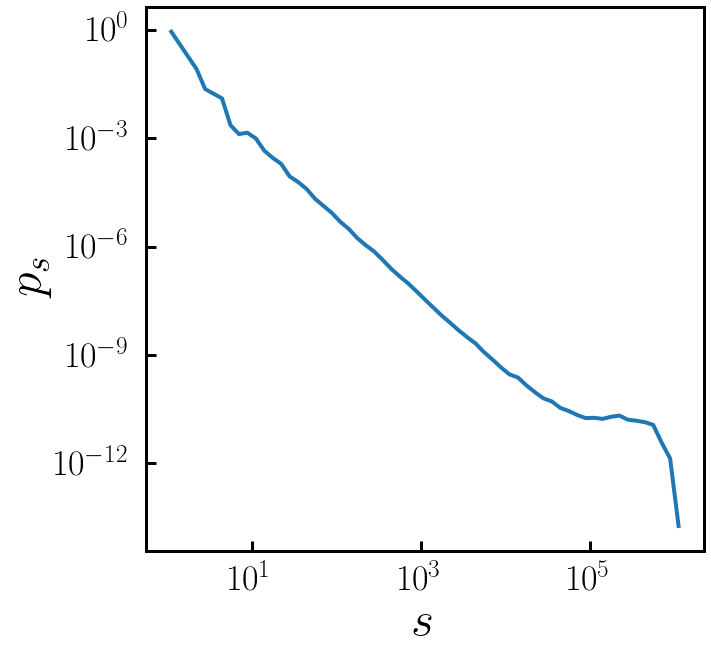

In [9]:
_, ax = plt.subplots(figsize=(10,10))

ax.plot(op, distribution)

# default setting
ax.set_xlabel(latexBoldString("s"))
ax.set_ylabel(latexBoldString("p_s"))
ax.set_xscale('log')
ax.set_yscale('log')
# ax.legend(loc="upper right")
# ax.set_xlim([1,1e6])
# ax.set_ylim([1e-11,1])
# xtick = [1e0, 1e2, 1e4, 1e6]
# ytick = [1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1e0]
# ax.set_xticks(xtick)
# ax.set_yticks(ytick)
# ax.set_xticklabels(list_latexBoldSci(xtick))
# ax.set_yticklabels(list_latexBoldSci(ytick))
# minortick_x = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# ax.xaxis.set_minor_locator(minortick_x)
# ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# minortick_y = matplotlib.ticker.LogLocator(base=1e2, subs=np.arange(10,100,10))
# ax.yaxis.set_minor_locator(minortick_y)
# ax.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# save and show
plt.show()